In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

import librosa

In [20]:
audio = '/home/urev/projects/example-tg-bot/src/music.wav'
x, sr = librosa.load(audio)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

/home/urev/projects/example-tg-bot/venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


<AxesSubplot: >

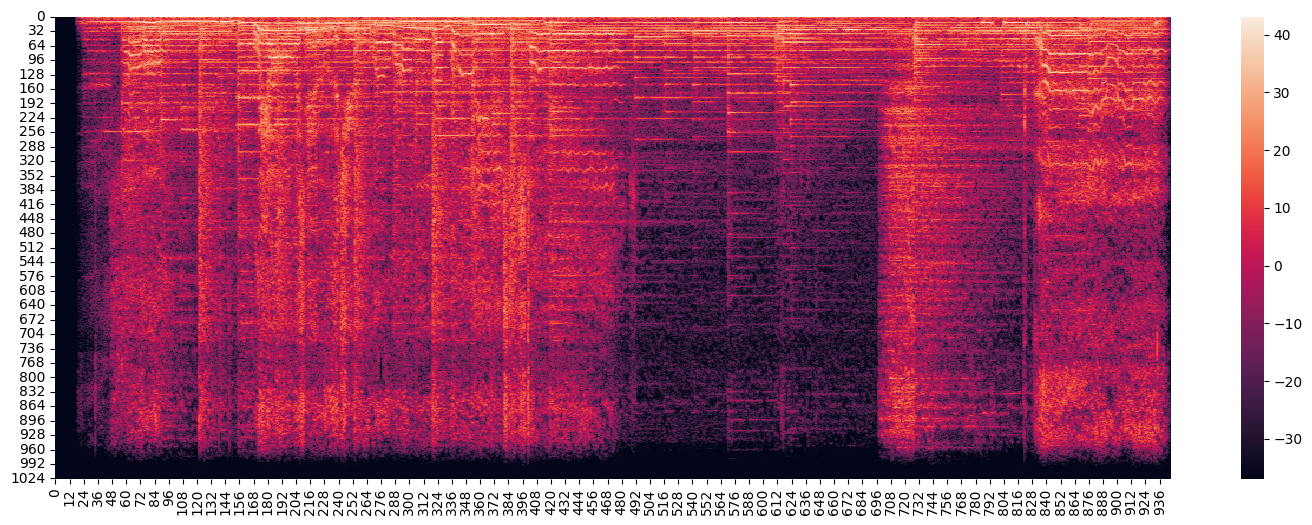

In [23]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(data=Xdb, ax=ax)

In [28]:
import soundfile as sf
import pyloudnorm as pyln
from pyloudnorm import IIRfilter

In [56]:

data, rate = sf.read("/home/urev/projects/example-tg-bot/src/audio-2022-10-10 00:43:05.246392.wav", stop=250*1024) # load audio

# block size
meter1 = pyln.Meter(rate)                               # 400ms block size
meter2 = pyln.Meter(rate, block_size=1)             # 200ms block size

# filter classes
meter3 = pyln.Meter(rate)                               # BS.1770 meter
meter4 = pyln.Meter(rate, filter_class="DeMan")         # fully compliant filters
meter5 = pyln.Meter(rate, filter_class="Fenton/Lee 1")  # low complexity improvement by Fenton and Lee
meter6 = pyln.Meter(rate, filter_class="Fenton/Lee 2")  # higher complexity improvement by Fenton and Lee
meter7 = pyln.Meter(rate, filter_class="Dash et al.")   # early modification option

In [57]:
for m in (meter1, meter2, meter3, meter4, meter5, meter6, meter7):
    print(m.filter_class, m.integrated_loudness(data))

K-weighting -38.55818943076632
K-weighting -38.62059671428824
K-weighting -38.55818943076632
DeMan -38.540191289326
Fenton/Lee 1 -44.568163877359524
Fenton/Lee 2 -38.55818943076632
Dash et al. -49.024012568543874
